<a href="https://colab.research.google.com/github/BrandyTee/My-ML-Projects/blob/main/Supervised%20Learning/Spam_Mail_Prediction_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Load Model
path = "/content/drive/MyDrive/datasets/spam_ham_dataset.csv"

df = pd.read_csv(path)
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
#Drop Unnecessary Values
df = df.drop(["Unnamed: 0", "label"], axis=1)

<Axes: xlabel='label_num', ylabel='count'>

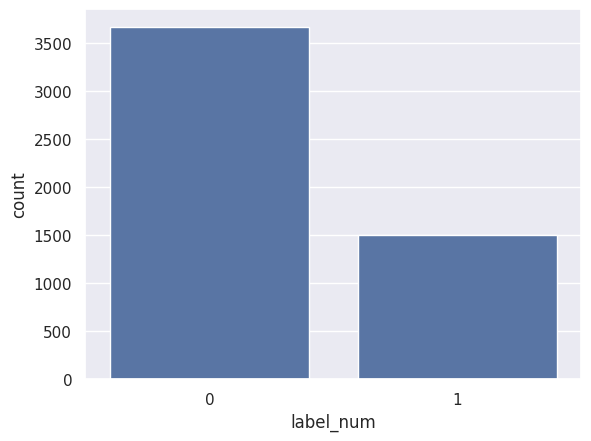

In [ ]:

sns.set()
sns.countplot(x="label_num", data=df)

In [ ]:
#Spam = 1
#Ham = 0

In [ ]:
#Split our Data
X = df["text"]
Y = df["label_num"]

In [ ]:
#Turn our text to Numerical values
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)

X = vectorizer.fit_transform(X)

In [ ]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 252107 stored elements and shape (5171, 5000)>
  Coords	Values
  (0, 4428)	0.039343637584892996
  (0, 1813)	0.08902561615041069
  (0, 3056)	0.21956593634124602
  (0, 3054)	0.11407462932989007
  (0, 2071)	0.17659075827577964
  (0, 3252)	0.16164715250589948
  (0, 2166)	0.22265329513987728
  (0, 3131)	0.1637459774373792
  (0, 0)	0.11422742034748959
  (0, 3617)	0.22966622895647562
  (0, 2060)	0.13850256722599677
  (0, 1452)	0.18134947394499892
  (0, 3718)	0.18841041708736522
  (0, 1443)	0.10279431229422241
  (0, 3576)	0.2524099144132273
  (0, 1434)	0.29037402671139456
  (0, 4840)	0.1294218029255237
  (0, 3631)	0.2203153616208194
  (0, 4992)	0.18708781733525756
  (0, 3849)	0.2043628893540923
  (0, 455)	0.17889821253888977
  (0, 3279)	0.24610145129926814
  (0, 2159)	0.09894398616266015
  (0, 1314)	0.17634253260957805
  (0, 1063)	0.13471834178443445
  :	:
  (5170, 4559)	0.05342951320361022
  (5170, 3662)	0.06826213341986076
  (5170

In [ ]:
#Train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.15, random_state=20
)

In [ ]:
#Model Function
def model_function(model):
    # Convert sparse data to dense array if required by the model
    # Check if the model is GaussianNB, which requires dense input
    if isinstance(model, GaussianNB):
        model.fit(X_train.toarray(), y_train)
    elif hasattr(model, 'partial_fit'): # Check if model supports partial_fit (often indicates support for sparse data)
        model.fit(X_train, y_train)
    else:
        model.fit(X_train.toarray(), y_train)

    pred = model.predict(X_test.toarray())

    #Accuracy
    accuracy = accuracy_score(y_test, pred)
    matrix = confusion_matrix(y_test, pred)

    print("Accuracy: ", round((accuracy * 100),2))
    sns.heatmap(matrix, annot=True, cmap="Reds")

Accuracy:  96.65


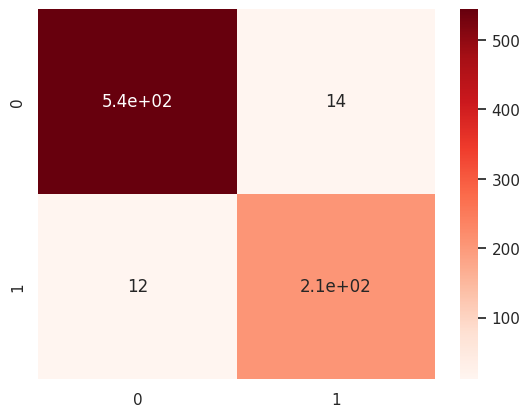

In [ ]:
tree = DecisionTreeClassifier()
boost = AdaBoostClassifier(tree, learning_rate=0.01, n_estimators=100)

model_function(boost)

Accuracy:  97.55


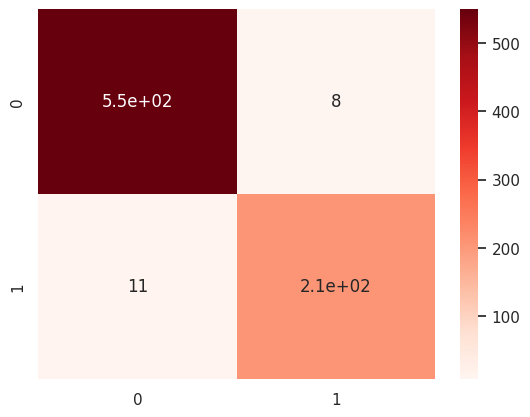

In [ ]:
#Neighbors
neighbors = KNeighborsClassifier()
model_function(neighbors)

Accuracy:  97.68


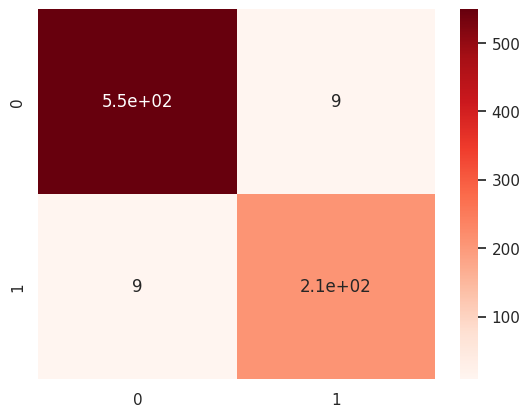

In [ ]:
#Naive Bayes
naive = GaussianNB()
model_function(naive)

In [ ]:
#Save our model
import joblib

In [ ]:
joblib.dump(naive, "Spam_prediction_chatGPT.csv")

['Spam_prediction_chatGPT.csv']